In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'data',
 '영문분석+워드클라우드_영문제목키워드분석(2).ipynb',
 '오징어게임_naver_news.json',
 '한글분석+워드클라우드_키워드 분석.ipynb']

In [2]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [4]:
inputFileName = '오징어게임_naver_news'
data = json.loads(open(inputFileName + '.json', 'r', encoding='utf-8').read())

data[0]

{'cnt': 1,
 'description': '넷플릭스가 글로벌 흥행작 ‘<b>오징어게임</b>’ 시즌2의 새 얼굴을 공개했다. 시즌1의 이정재, 이병헌, 위하준, 공유가 다시 한번 활약하며, 임시완, 강하늘, 박성훈, 양동근이 새로운 참가자로 합류한다. 넷플릭스는 17일... ',
 'link': 'https://n.news.naver.com/mnews/article/030/0003109188?sid=105',
 'org_link': 'https://www.etnews.com/20230619000132',
 'pDate': '2023-06-19 11:42:00',
 'title': '‘<b>오징어게임</b> 2’ 합류한 임시완·강하늘·박성훈·양동근…흥행 새 기록 쓸까'}

In [6]:
description = ''
for item in data:
    if 'description' in item.keys():
        description = description + re.sub(r'[^\w]', ' ', item['description']) + ''
        
description[:100]

'넷플릭스가 글로벌 흥행작   b 오징어게임  b   시즌2의 새 얼굴을 공개했다  시즌1의 이정재  이병헌  위하준  공유가 다시 한번 활약하며  임시완  강하늘  박성훈  양동근'

In [7]:
nlp = Okt()
message_n = nlp.nouns(description)

message_n[:10]

['넷플릭스', '글로벌', '흥행', '작', '오징어', '게임', '시즌', '의', '새', '얼굴']

In [8]:
count = Counter(message_n)

count

Counter({'넷플릭스': 561,
         '글로벌': 132,
         '흥행': 27,
         '작': 16,
         '오징어': 1174,
         '게임': 1261,
         '시즌': 353,
         '의': 310,
         '새': 11,
         '얼굴': 16,
         '공개': 168,
         '이정재': 75,
         '이병헌': 56,
         '위': 62,
         '준': 41,
         '공유': 39,
         '다시': 10,
         '한번': 3,
         '활약': 14,
         '임시완': 212,
         '강하늘': 67,
         '박성훈': 56,
         '양동근': 56,
         '참가자': 24,
         '합류': 40,
         '앞서': 15,
         '배우': 267,
         '출연': 114,
         '보도': 42,
         '당시': 9,
         '소속사': 35,
         '측은': 42,
         '확인': 53,
         '불가': 16,
         '입장': 26,
         '바': 16,
         '유튜브': 39,
         '캡처': 4,
         '지난': 44,
         '드라마': 233,
         '시리즈': 186,
         '캐스팅': 168,
         '라인업': 35,
         '진': 45,
         '중': 34,
         '이름': 6,
         '누리꾼': 1,
         '주목': 16,
         '현지': 75,
         '시간': 56,
         '브라질': 82,
         '

In [9]:
word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print('%s : %d' %(tag, counts))

게임 : 1261
오징어 : 1174
넷플릭스 : 561
시즌 : 353
배우 : 267
드라마 : 233
농심 : 231
한국 : 230
임시완 : 212
콘텐츠 : 192
시리즈 : 186
세계 : 180
감독 : 179
공개 : 168
캐스팅 : 168
참여 : 150
영화 : 147
기생충 : 138
글로벌 : 132
출연 : 114
대한 : 112
인기 : 106
이벤트 : 104
작품 : 101
리지 : 88
간식 : 85
라면 : 84
스낵 : 84
브라질 : 82
소리 : 81
상파울루 : 78
영상 : 78
연기 : 77
이정재 : 75
현지 : 75
제작 : 75
구성 : 75
팝업 : 74
음료 : 73
룰렛 : 73
키트 : 73
새우깡 : 73
스타 : 70
강하늘 : 67
또한 : 67
작성 : 67
메시지 : 66
통해 : 65
주문 : 65
우리 : 64
인생 : 64
스토어 : 62
정재 : 60
캠퍼스 : 59
무빙 : 57
황동 : 57
위해 : 57
음악 : 57
이병헌 : 56
박성훈 : 56
양동근 : 56
시간 : 56


In [10]:
# 폰트 설정
font_path = "c:/Windows/fonts/malgun.ttf"
#font_path = '/Library/Fonts/NanumBarunGothic.ttf' => mac
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

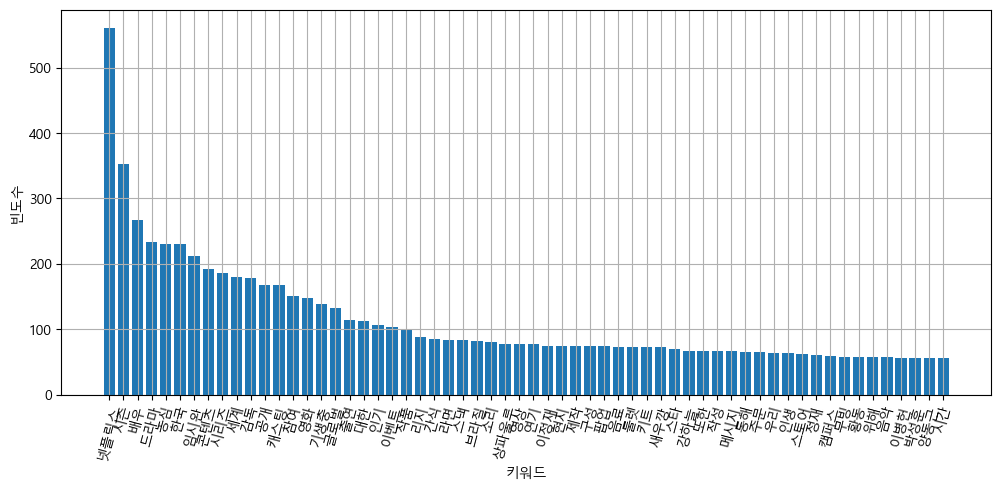

In [13]:
del word_count['오징어']
del word_count['게임']

plt.figure(figsize=(12,5))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)# x축 눈금
plt.show()

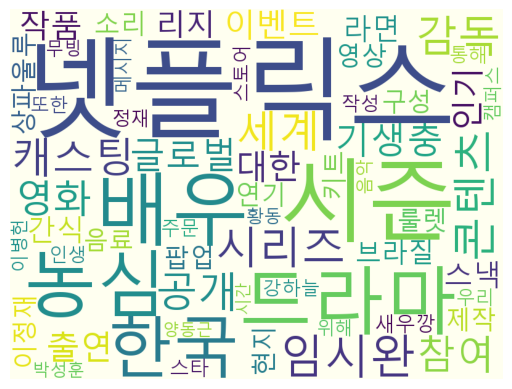

In [14]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.imshow(cloud)
plt.axis('off')
plt.show()